In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning

## Feeding America

### Importing Data

In [70]:
def load_data():
    global data, data2018, data2017, data2016, data2015, data2014

    def ind_year_col(filepath):
        x = pd.read_csv(filepath)
        year = int(filepath.split('_')[0].split('/')[-1])
        x['Year'] = year
        x.rename(columns={f'{year} Food Insecurity Rate': 'Overall Food Insecurity Rate',
                                 f'{year} Child food insecurity rate': 'Child Food Insecurity Rate',
                                 f'# of Food Insecure Persons in {year}': '# of Food Insecure Persons Overall',
                                 f'# of Food Insecure Children in {year}': '# of Food Insecure Children',
                                 f'% food insecure children in HH w/ HH incomes below 185 FPL in {year}': '% food insecure children in HH w/ HH incomes below 185 FPL',
                                 f'% food insecure children in HH w/ HH incomes above 185 FPL in {year}': '% food insecure children in HH w/ HH incomes above 185 FPL',
                                 f'{year} Cost Per Meal': 'Cost Per Meal',
                                 f'{year} Weighted Annual Food Budget Shortfall': 'Weighted Annual Food Budget Shortfall'}, inplace=True)
        x['County, State'] = x['County, State'].str.upper()
        return x


    data = pd.read_csv("./Datasets/2019-2022_FA.csv")
    data['County, State'] = data['County, State'].str.upper()
    data2018 = ind_year_col("./Datasets/2018_FA.csv")
    data2017 = ind_year_col("./Datasets/2017_FA.csv")
    data2016 = ind_year_col("./Datasets/2016_FA.csv")
    data2015 = ind_year_col("./Datasets/2015_FA.csv")
    data2014 = ind_year_col("./Datasets/2014_FA.csv")

### Functions

In [71]:
def format_data(x):
# Removing whitespace from column names
    df_dw = x.copy()
    df_dw.columns = df_dw.columns.str.strip()

    # Changing column types to #s
    for col in df_dw.columns.tolist():
        if 'Rate' in col or '%' in col:
            df_dw[col] = df_dw[col].str.strip().str.replace('%', '').astype("float64")/100

    for col in df_dw.columns.tolist():
        if '#' in col:
            df_dw = df_dw[~df_dw[col].str.contains('%|-', na=False)]
            df_dw[col] = df_dw[col].str.strip().str.replace(',', '').astype("float64")


    # Splitting 'County, State' col to just 'County'. Code from Jetbrains' Data Wrangler
    # Split column County, State by delimiter ','
    num_splits = int(min(df_dw['County, State'].str.count(', ').max() + 1, 2))
    if num_splits <= 1:
        raise Exception("num_splits is not sufficient")

    new_columns = [f'County, State_{i + 1}' for i in range(num_splits)]
    split_cols = df_dw['County, State'].str.split(', ', n=num_splits - 1, expand=True)

    col_index = df_dw.columns.get_loc('County, State')
    df_dw = df_dw.drop('County, State', axis=1)
    for i, col in enumerate(new_columns):
        df_dw.insert(col_index + i, col, split_cols[i])

    # Drop Column County, State_2
    df_dw = df_dw.drop(columns=['County, State_2'])
    df_dw.rename(columns={'County, State_1': 'County'}, inplace=True)

    df_dw['County'] = df_dw['County'].str.split(' COUNTY').str[0]
    return df_dw

def compare_cols(x, y):
    # Get the set of columns for each DataFrame
    columns_x = set(x.columns)
    columns_y = set(y.columns)

    # Find columns that are in x but not in y
    columns_only_in_x = columns_x - columns_y

    # Find columns that are in y but not in x
    columns_only_in_y = columns_y - columns_x

    # Find columns that are in both x and y
    common_columns = list(columns_x & columns_y)

    # Print the results in a cleaner format
    common_cols_goal = ['# of Food Insecure Persons Overall', '# of Food Insecure Children', 'FIPS', 'Overall Food Insecurity Rate', 'County', '% food insecure children in HH w/ HH incomes below 185 FPL', 'Cost Per Meal', '% food insecure children in HH w/ HH incomes above 185 FPL', 'State', 'Year', 'Weighted Annual Food Budget Shortfall', 'Child Food Insecurity Rate']
    if common_columns == common_cols_goal:
        print('1')
    else:
        print("Columns only in x:")
        for col in columns_only_in_x:
            print(f"  - {col}")

        print("\nColumns only in y:")
        for col in columns_only_in_y:
            print(f"  - {col}")

        print("\nCommon columns:")
        for col in common_columns:
            print(f"  - {col}")

def list_columns(df):
    """
    This function prints all columns of a DataFrame in a neat format.
    """
    print("Columns in DataFrame:")
    for col in df.columns:
        print(f"  - {col}")

### Cleaning the Data

In [72]:
load_data()
data = format_data(data)
data2018 = format_data(data2018)
data2017 = format_data(data2017)
data2016 = format_data(data2016)
data2015 = format_data(data2015)
data2014 = format_data(data2014)

data_full = pd.concat([data, data2018, data2017, data2016, data2015, data2014])

In [73]:
data_full

,FIPS,State,County,Year,Overall Food Insecurity Rate,# of Food Insecure Persons Overall,Food Insecurity Rate among Black Persons (all ethnicities),Food Insecurity Rate among Hispanic Persons (any race),"Food Insecurity Rate among White, non-Hispanic Persons",SNAP Threshold,...,Cost Per Meal,Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall,Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI > High Threshold
0,1001,AL,AUTAUGA,2019,0.157,8670.0,0.26,NaN,0.12,130%,...,$ 3.00,$ 16.88,"$ 4,439,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,AL,AUTAUGA,2020,0.145,8070.0,0.25,NaN,0.09,130%,...,$ 3.22,$ 17.09,"$ 4,184,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001,AL,AUTAUGA,2021,0.133,7770.0,0.23,NaN,0.09,130%,...,$ 3.60,$ 20.99,"$ 4,947,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001,AL,AUTAUGA,2022,0.151,8860.0,0.23,NaN,0.11,130%,...,$ 4.01,$ 24.86,"$ 6,680,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1003,AL,BALDWIN,2019,0.134,28590.0,0.26,0.1,0.11,130%,...,$ 3.66,$ 20.63,"$ 17,895,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,WY,SWEETWATER,2014,0.110,4880.0,NaN,NaN,NaN,NaN,...,$3.22,NaN,"$2,776,000.00",130%,SNAP,185%,Other Nutrition Program,0.434,0.105,0.461
3138,56039,WY,TETON,2014,0.117,2560.0,NaN,NaN,NaN,NaN,...,$4.12,NaN,"$1,862,000.00",130%,SNAP,185%,Other Nutrition Program,0.358,0.205,0.437
3139,56041,WY,UINTA,2014,0.131,2740.0,NaN,NaN,NaN,NaN,...,$3.02,NaN,"$1,459,000.00",130%,SNAP,185%,Other Nutrition Program,0.482,0.166,0.352
3140,56043,WY,WASHAKIE,2014,0.126,1070.0,NaN,NaN,NaN,NaN,...,$3.10,NaN,"$586,000.00",130%,SNAP,185%,Other Nutrition Program,0.502,0.195,0.303


## Education

In [14]:
edu = pd.read_csv('./Datasets/Education/Education2023.csv')
edu_temp = edu.loc[edu['Area name'].str.contains('County|City')]
edu_temp.loc[:, 'Area name'] = edu_temp['Area name'].str.upper().str.split(' COUNTY').str[0]
edu_temp = edu_temp.rename(columns={'Area name': 'County'})
edu = edu_temp
edu


,FIPS Code,State,County,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970",...,"Some college or associate degree, 2019-23","Bachelor's degree or higher, 2019-23","Percent of adults who are not high school graduates, 2019-23","Percent of adults who are high school graduates (or equivalent), 2019-23","Percent of adults completing some college or associate degree, 2019-23","Percent of adults with a bachelor's degree or higher, 2019-23",2013 Urban Influence Code,2024 Urban Influence Code,2013 Rural-urban Continuum Code,2023 Rural-urban Continuum Code
2,1001,AL,AUTAUGA,6611.0,3757.0,933.0,767.0,54.8,31.1,7.7,...,11953.0,11530.0,9.721098,32.675939,29.320284,28.282680,2.0,4.0,2.0,2.0
3,1003,AL,BALDWIN,18726.0,8426.0,2334.0,2038.0,59.4,26.7,7.4,...,53990.0,56408.0,8.268600,27.542038,31.391725,32.797637,2.0,4.0,3.0,3.0
4,1005,AL,BARBOUR,8120.0,2242.0,581.0,861.0,68.8,19.0,4.9,...,5067.0,2021.0,22.186295,37.604947,28.744044,11.464715,6.0,5.0,6.0,6.0
5,1007,AL,BIBB,5272.0,1402.0,238.0,302.0,73.1,19.4,3.3,...,4420.0,1827.0,19.659783,41.127362,27.744649,11.468207,1.0,1.0,1.0,1.0
6,1009,AL,BLOUNT,10677.0,3440.0,626.0,404.0,70.5,22.7,4.1,...,12912.0,6386.0,17.303798,35.617575,31.499597,15.579030,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,56037,WY,SWEETWATER,4393.0,3731.0,986.0,960.0,43.6,37.1,9.8,...,11349.0,5639.0,7.468835,31.147245,41.008130,20.375790,8.0,7.0,5.0,5.0
3211,56039,WY,TETON,708.0,908.0,524.0,455.0,27.3,35.0,20.2,...,3554.0,10992.0,2.840434,16.145920,19.793929,61.219716,8.0,7.0,7.0,7.0
3212,56041,WY,UINTA,1569.0,1517.0,445.0,352.0,40.4,39.1,11.5,...,4993.0,2854.0,5.393292,35.990140,37.297378,21.319190,8.0,7.0,7.0,7.0
3213,56043,WY,WASHAKIE,1572.0,1437.0,590.0,432.0,39.0,35.6,14.6,...,2152.0,1212.0,8.580258,30.267224,39.120160,22.032358,11.0,9.0,7.0,9.0


## Unemployment

In [29]:
unemp = pd.read_csv('./Datasets/Unemployment/Unemployment2023.csv')
unemp_temp = unemp.loc[unemp['Area_Name'].str.contains('County|City')]
unemp_temp.loc[:, 'Area_Name'] = unemp_temp['Area_Name'].str.upper().str.split(' COUNTY').str[0]
unemp_temp = unemp_temp.rename(columns={'Area_Name': 'County', 'FIPS_Code': 'FIPS'})

#removes columns with the _[year] suffix that arent within the timeframe of 2014-2022
unemp_cols = unemp_temp.columns.tolist()
cols_remove = ['FIPS', 'State', 'County']
unemp_cols = [col for col in unemp_cols if col not in cols_remove]

for col in unemp_cols:
    if (int(col.split('_')[-1]) < 2014) or (int(col.split('_')[-1]) >= 2023):
        unemp_temp = unemp_temp.drop(col, axis=1)

unemp = unemp_temp
unemp

,FIPS,State,County,Civilian_labor_force_2014,Employed_2014,Unemployed_2014,Unemployment_rate_2014,Civilian_labor_force_2015,Employed_2015,Unemployed_2015,...,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Civilian_labor_force_2022,Employed_2022,Unemployed_2022,Unemployment_rate_2022,Median_Household_Income_2022,Med_HH_Income_Percent_of_State_Total_2022
2,1001,AL,AUTAUGA,25639.0,24150.0,1489.0,5.8,25541.0,24206.0,1335.0,...,26429.0,25698.0,731.0,2.8,26656.0,26065.0,591.0,2.2,70148.0,117.5
3,1003,AL,BALDWIN,86546.0,81265.0,5281.0,6.1,87493.0,82619.0,4874.0,...,99520.0,96619.0,2901.0,2.9,102280.0,99930.0,2350.0,2.3,71704.0,120.1
4,1005,AL,BARBOUR,8859.0,7930.0,929.0,10.5,8590.0,7823.0,767.0,...,8243.0,7787.0,456.0,5.5,8139.0,7813.0,326.0,4.0,41151.0,68.9
5,1007,AL,BIBB,8573.0,7959.0,614.0,7.2,8552.0,7983.0,569.0,...,8604.0,8312.0,292.0,3.4,8688.0,8476.0,212.0,2.4,54309.0,91.0
6,1009,AL,BLOUNT,24571.0,23074.0,1497.0,6.1,24416.0,23089.0,1327.0,...,25268.0,24674.0,594.0,2.4,25685.0,25128.0,557.0,2.2,60553.0,101.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,56037,WY,SWEETWATER,23026.0,22061.0,965.0,4.2,22556.0,21509.0,1047.0,...,19325.0,18236.0,1089.0,5.6,19898.0,19115.0,783.0,3.9,75779.0,106.3
3203,56039,WY,TETON,14272.0,13579.0,693.0,4.9,14574.0,14016.0,558.0,...,15889.0,15368.0,521.0,3.3,16829.0,16392.0,437.0,2.6,127677.0,179.1
3204,56041,WY,UINTA,9774.0,9281.0,493.0,5.0,9593.0,9120.0,473.0,...,8800.0,8352.0,448.0,5.1,9017.0,8691.0,326.0,3.6,73072.0,102.5
3205,56043,WY,WASHAKIE,4228.0,4036.0,192.0,4.5,4233.0,4058.0,175.0,...,3934.0,3774.0,160.0,4.1,3848.0,3699.0,149.0,3.9,60699.0,85.2


# Data Analysis

In [74]:
# Group by 'Year' and calculate the mean of 'Overall Food Insecurity Rate'
data_full.groupby('Year')[['# of Food Insecure Persons Overall', '# of Food Insecure Children']].sum()

,# of Food Insecure Persons Overall,# of Food Insecure Children
Year,,
2014,44881210.0,15714480.0
2015,42822870.0,14490920.0
2016,41502080.0,13701510.0
2017,40293940.0,13271840.0
2018,38053930.0,12047610.0
2019,36960090.0,11290770.0
2020,37580520.0,12308830.0
2021,33826480.0,9832210.0
2022,42636120.0,13120980.0


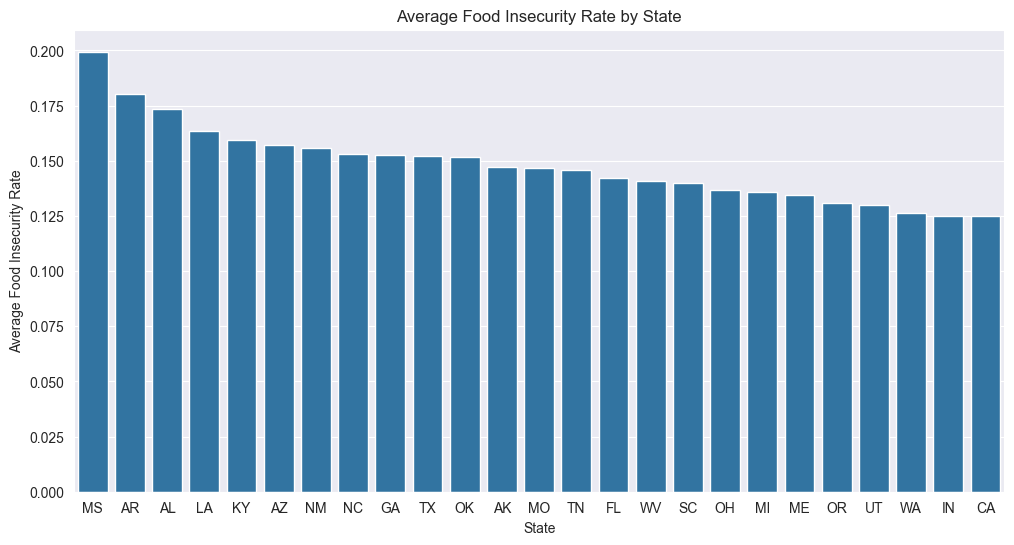

In [75]:
# Histogram of 'Overall Food Insecurity Rate' per state (top 25), averaged over 2019-2022, sorted by descending order
plt.figure(figsize=(12, 6))
avg_insecurity_rate = data_full.groupby('State')[['Overall Food Insecurity Rate']].mean().reset_index().sort_values(by='Overall Food Insecurity Rate', ascending=False).head(25)
sns.barplot(data=avg_insecurity_rate, x='State', y='Overall Food Insecurity Rate')
plt.title('Average Food Insecurity Rate by State')
plt.xlabel('State')
plt.ylabel('Average Food Insecurity Rate')
plt.xticks(rotation=0)
plt.show()

# Optional

In [78]:
#SET BOOLEANS TO TRUE TO USE THE FUNCTIONS
export_data = False
if export_data==True:
    data_full.to_csv('./Datasets/All_FA_Data.csv', index=False)